# Numpy, Pandas, Matplotlib and Seaborn section
## Load numpy, pandas, matplotlib and seaborn libs

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns

%load_ext autoreload
%autoreload 2

## Load data with pandas

In [2]:
df = pd.read_csv("./titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Plot two charts in one figure with matplotlib

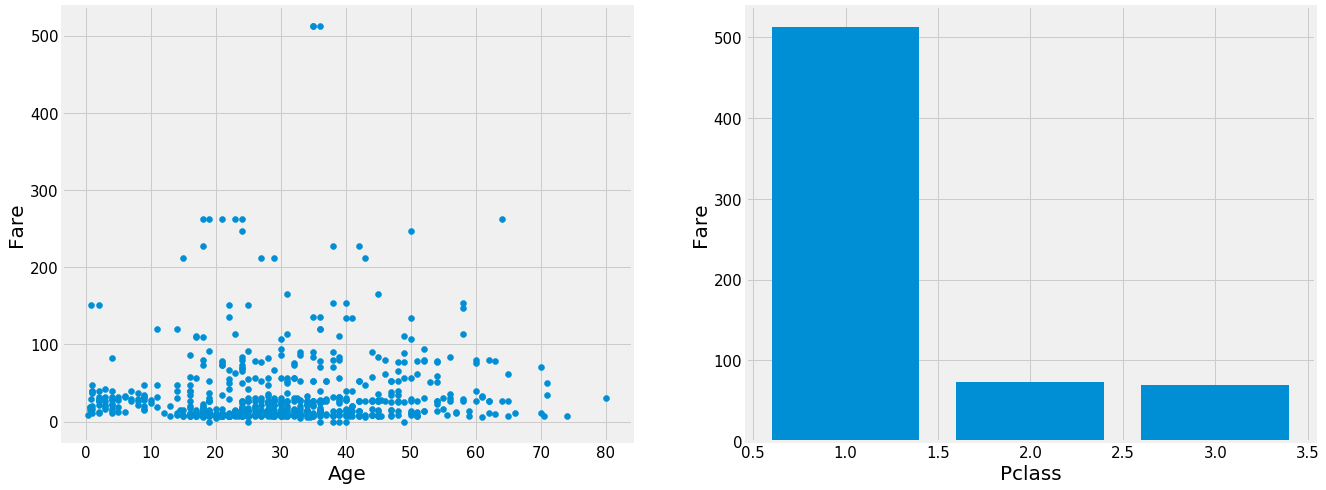

In [3]:
fig, ax = plt.subplots(1, 2, figsize=[20, 8])
ax[0].scatter("Age", "Fare", data=df)
ax[0].set_xlabel("Age", fontsize=20)
ax[0].set_ylabel("Fare", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].bar("Pclass", "Fare", data=df)
ax[1].set_xlabel("Pclass", fontsize=20)
ax[1].set_ylabel("Fare", fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=15)

## Plot two charts in one figure with pandas

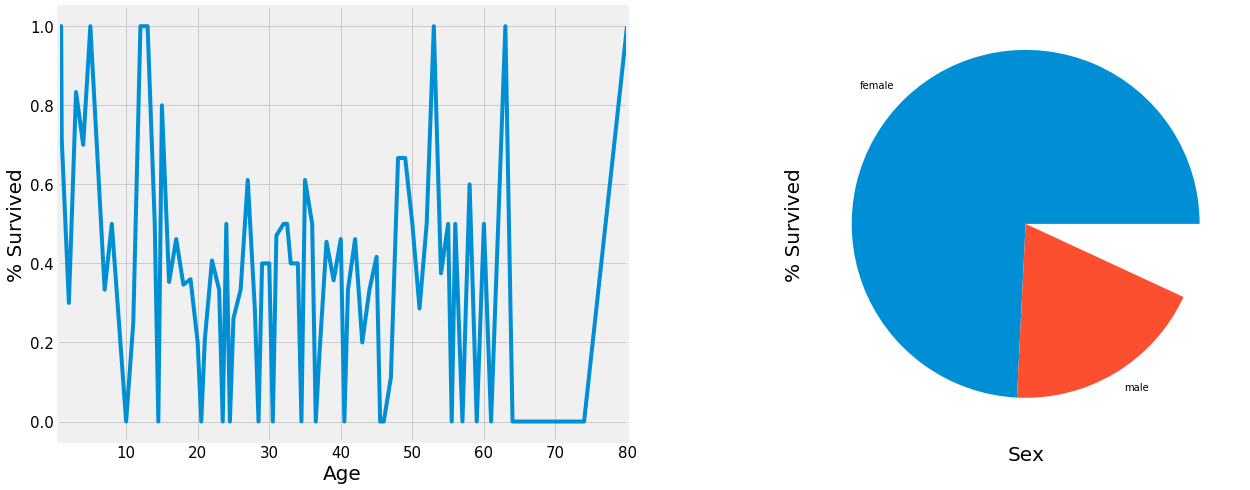

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[20, 8])
df.groupby("Age")["Survived"].mean().plot.line(ax=ax[0])
ax[0].set_xlabel("Age", fontsize=20)
ax[0].set_ylabel("% Survived", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=15)
df.groupby("Sex")["Survived"].mean().plot.pie(ax=ax[1])
ax[1].set_xlabel("Sex", fontsize=20)
ax[1].set_ylabel("% Survived", fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=15)

## BoxPlot with Seaborn 

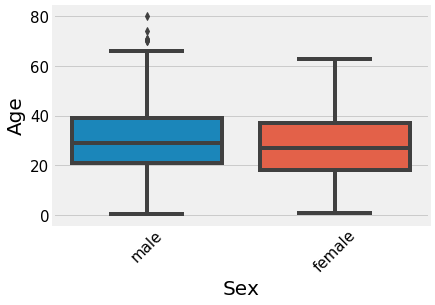

In [5]:
ax = sns.boxplot("Sex", "Age", data=df)
ax.set_xlabel("Sex", fontsize=20)
ax.set_ylabel("Age", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', which='major', labelsize=15)

# Spark Section
## Start spark session and context

In [6]:
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder \
    .master("local[*]") \
    .appName("My App") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()
sparkContext = sparkSession.sparkContext

## Load data into Spark dataframe

In [7]:
from pyspark.sql.types import *
schema = StructType([ \
    StructField("PassengerId", StringType(), True),\
    StructField("Survived", IntegerType(), True),\
    StructField("Pclass", IntegerType(), True),\
    StructField("Name", StringType(), True),\
    StructField("Sex", StringType(), True),\
    StructField("Age", IntegerType(), True),\
    StructField("SibSp", IntegerType(), True),\
    StructField("Parch", IntegerType(), True),\
    StructField("Ticket", StringType(), True),\
    StructField("Fare", DoubleType(), True),\
    StructField("Cabin", StringType(), True),\
    StructField("Embarked", StringType(), True),
    ])

ds = sparkSession.read \
    .format("csv") \
    .option("header", True) \
    .schema(schema) \
    .load("titanic.csv")
ds.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      